<a href="https://colab.research.google.com/github/21PA1A6132/MACHINE-LEARNING/blob/main/TrafficPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('/content/TrafficTwoMonth.csv')
x=dataset.iloc[:,:-2].values
y=dataset.iloc[:,-1].values
print(x)

[['12:00:00 AM' 10 'Tuesday' ... 2 2 24]
 ['12:15:00 AM' 10 'Tuesday' ... 1 1 36]
 ['12:30:00 AM' 10 'Tuesday' ... 2 2 32]
 ...
 ['11:15:00 PM' 9 'Thursday' ... 4 1 25]
 ['11:30:00 PM' 9 'Thursday' ... 5 0 27]
 ['11:45:00 PM' 9 'Thursday' ... 3 1 15]]


In [ ]:
missing_data=dataset.isnull().sum()



In [ ]:
print(missing_data)

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [ ]:
x1 = x[:,3:]
print(x1)

[[13 2 2 24]
 [14 1 1 36]
 [10 2 2 32]
 ...
 [15 4 1 25]
 [16 5 0 27]
 [14 3 1 15]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[-1.01174554 -0.79220589 -0.95298623  1.48083166]
 [ 1.44097417  0.9312489   0.08121532 -0.05745046]
 [ 1.03962003  0.58655794  0.16076928 -0.05745046]
 ...
 [-1.25701751 -0.87837863 -0.95298623  0.66644701]
 [-1.01174554 -0.96455137 -1.03254019  0.39498546]
 [-0.20903727 -0.53368767  1.0358629  -1.23378384]]
[[ 1.06191749  0.15569424  0.55853911 -1.23378384]
 [-0.14214492 -0.70603315 -0.39610847  1.02839574]
 [-0.34282198 -0.70603315 -0.5552164  -0.50988637]
 ...
 [-0.25363218  0.5003852   0.71764704  0.66644701]
 [-0.94485319 -0.3613422   2.1496184   0.75693419]
 [ 1.7977334   0.9312489   0.797201   -1.32427102]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

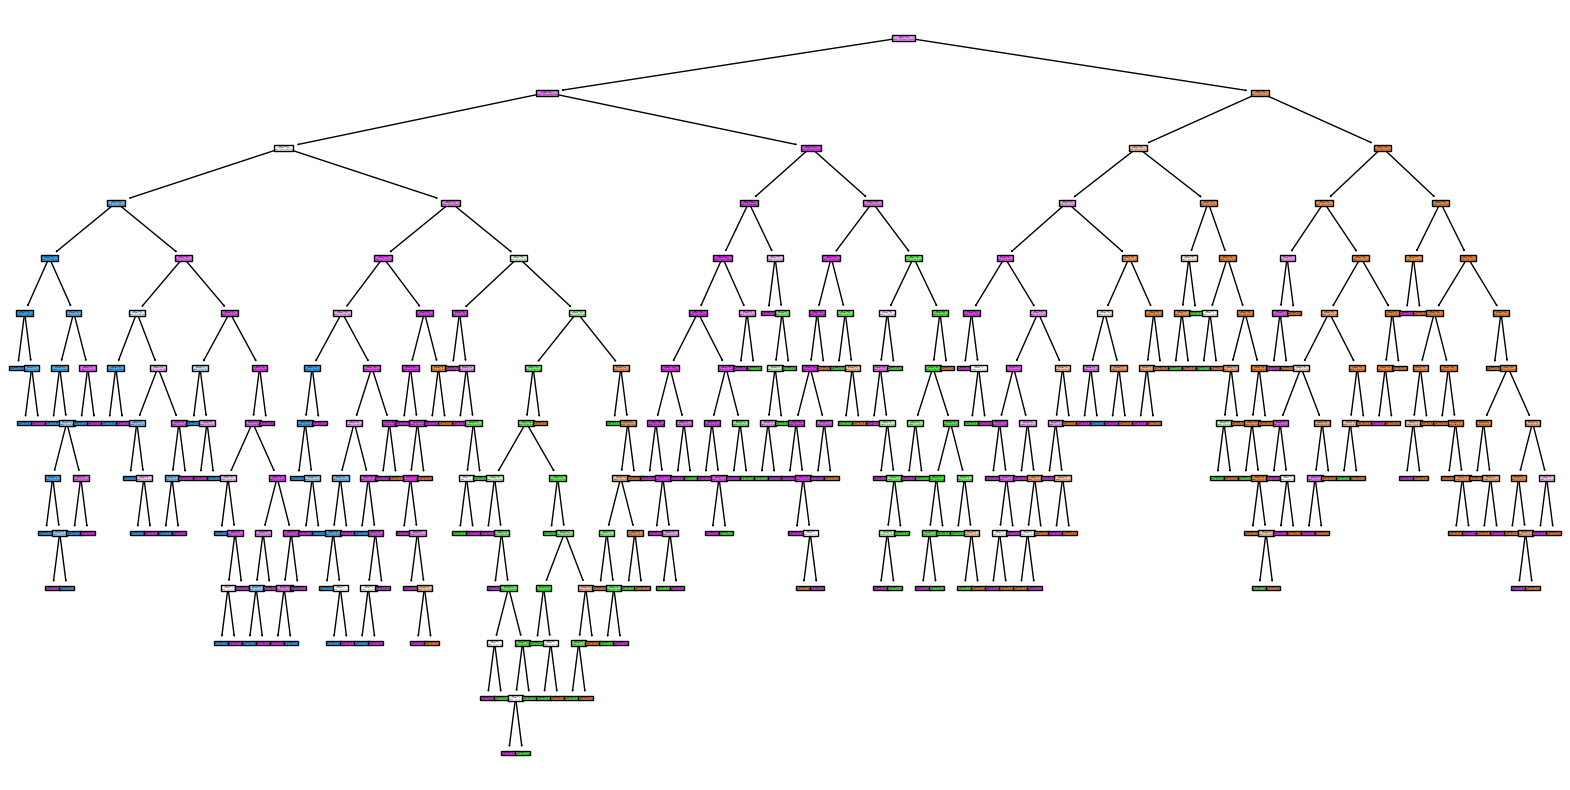

In [ ]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is a trained DecisionTreeClassifier
# Textual representation of the decision rules
tree_rules = export_text(classifier, feature_names=['BusCount', 'CarCount', 'BikeCount', 'TruckCount'])
# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=['BusCount', 'CarCount', 'BikeCount', 'TruckCount'])
plt.show()


In [ ]:
import numpy as np

# Assuming 'model' is a trained RandomForestClassifier
importances = classifier.feature_importances_
feature_names = ['BusCount', 'CarCount', 'BikeCount', 'TruckCount']
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(len(feature_names)):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

Feature ranking:
1. BusCount (0.48519822355028475)
2. BikeCount (0.23444748556928835)
3. TruckCount (0.21981541788022493)
4. CarCount (0.060538873000201936)


In [ ]:
predicted_values=classifier.predict(x_test)
print(predicted_values)

['normal' 'normal' 'low' ... 'normal' 'normal' 'heavy']


In [ ]:
# Display evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, ytest_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, ytest_pred))

Classification Report:
              precision    recall  f1-score   support

       heavy       0.92      0.92      0.92       333
        high       0.83      0.84      0.83       120
         low       0.96      0.96      0.96       251
      normal       0.97      0.97      0.97      1082

    accuracy                           0.95      1786
   macro avg       0.92      0.92      0.92      1786
weighted avg       0.95      0.95      0.95      1786

Confusion Matrix:
[[ 307   15    0   11]
 [  11  101    0    8]
 [   0    0  241   10]
 [  14    6   11 1051]]


In [ ]:
# if BusCount<=20 and CarCount<=15 and BikeCount<=21 and TruckCount<=10:
#   print("low")
input_list = np.array( list(map(int,input().split())))
x_testing_point = scaler.transform(input_list.reshape(1,-1))
classifier.predict(x_testing_point)


15 9 6 6


array(['low'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
ytrain_pred=classifier.predict(x_train)
ytest_pred = classifier.predict(x_test)
training_accuracy=accuracy_score(ytrain_pred,y_train)
testing_accuracy=accuracy_score(ytest_pred,y_test)
print(f'The training data accuracy is {training_accuracy}')
print(f'The testing data accuracy is {testing_accuracy}')

The training data accuracy is 1.0
The testing data accuracy is 0.9518477043673013
